In [1]:
import pandas as pd
import bz2
import csv


In [2]:
mylist = []
# This data is the downloaded data from save_lyrics
for chunk in pd.read_csv('clean_lyrics.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
big_data = big_data.set_index('index')
mylist = []

for chunk in pd.read_csv('clean_lyrics2.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

big_data2 = pd.concat(mylist, axis= 0)
big_data2 = big_data2.set_index('index')
mylist = []
for chunk in pd.read_csv('clean_lyrics3.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

    
    
big_data3 = pd.concat(mylist, axis= 0)
big_data3 = big_data3.set_index('index')

mylist = []
for chunk in pd.read_csv('clean_lyrics4.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

big_data4 = pd.concat(mylist, axis= 0)
big_data4 = big_data4.set_index('index')

mylist = []
for chunk in pd.read_csv('clean_lyrics5.csv', sep=',', chunksize=20000):
    mylist.append(chunk)

big_data5 = pd.concat(mylist, axis= 0)
big_data5 = big_data5.set_index('index')

data = pd.concat([big_data,big_data2,big_data3,big_data4,big_data5])


In [3]:
with open("data/songDb.tsv") as f:
    songDB = pd.read_csv(f, dialect = 'excel-tab')

c:\users\46705\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (11,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
songDB.head()

,Name,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Type,ID,Uri,Ref_Track,URL_features,Duration_ms,time_signature,Genre
0,YuveYuveYu,0.624,0.857,10.0,-6.250,0.0,0.0542,0.020800,0.206000,0.110,0.324,131.926,audio_features,6J2VvzKwWc2f0JP5RQVZjq,spotify:track:6J2VvzKwWc2f0JP5RQVZjq,https://api.spotify.com/v1/tracks/6J2VvzKwWc2f...,https://api.spotify.com/v1/audio-analysis/6J2V...,282920.0,4.0,celticmetal
1,Gloryhammer,0.517,0.916,0.0,-4.933,1.0,0.0559,0.000182,0.001910,0.306,0.444,135.996,audio_features,4HA34COgxgVJ6zK88UN4Ik,spotify:track:4HA34COgxgVJ6zK88UN4Ik,https://api.spotify.com/v1/tracks/4HA34COgxgVJ...,https://api.spotify.com/v1/audio-analysis/4HA3...,300320.0,4.0,celticmetal
2,Nostos,0.251,0.894,8.0,-4.103,0.0,0.0570,0.014400,0.000000,0.123,0.297,114.223,audio_features,3W6Xik6Xxf06JuUoZSATlD,spotify:track:3W6Xik6Xxf06JuUoZSATlD,https://api.spotify.com/v1/tracks/3W6Xik6Xxf06...,https://api.spotify.com/v1/audio-analysis/3W6X...,175353.0,4.0,celticmetal
3,Yggdrasil,0.469,0.743,1.0,-5.570,0.0,0.0272,0.002220,0.000111,0.276,0.481,86.953,audio_features,2gGveBaLJQMtJ43X4UL5kH,spotify:track:2gGveBaLJQMtJ43X4UL5kH,https://api.spotify.com/v1/tracks/2gGveBaLJQMt...,https://api.spotify.com/v1/audio-analysis/2gGv...,272292.0,4.0,celticmetal
4,Incense&Iron,0.487,0.952,1.0,-4.429,0.0,0.0613,0.000228,0.000000,0.161,0.329,125.993,audio_features,1lRF81A1C9QoCgBcEop2zg,spotify:track:1lRF81A1C9QoCgBcEop2zg,https://api.spotify.com/v1/tracks/1lRF81A1C9Qo...,https://api.spotify.com/v1/audio-analysis/1lRF...,237933.0,4.0,celticmetal


In [7]:
def unique(data):
    unique_list = []
    for j in data:
        if j not in unique_list:
            unique_list.append(j)
    return unique_list
print(len(unique(songDB.Genre)))
songDB.shape

626


(131580, 20)

In [6]:
#Removing all duplicated data.
import numpy as np
print(np.sum(data.index.duplicated()))
dupli = data.index[np.where(data.index.duplicated())]
data = data.drop(dupli)
print(np.sum(data.index.duplicated()))


59
0


In [8]:
# Inner join the data with index
songDB2 = songDB
df = pd.concat([data, songDB2], axis=1,join = "inner")

In [9]:
df.head()
df.shape

(54100, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54100 entries, 0 to 78955
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lyrics            44796 non-null  object 
 1   language          44797 non-null  object 
 2   art_name          17078 non-null  object 
 3   song_name         17078 non-null  object 
 4   Name              54099 non-null  object 
 5   Danceability      54100 non-null  float64
 6   Energy            54100 non-null  float64
 7   Key               54100 non-null  float64
 8   Loudness          54100 non-null  float64
 9   Mode              54100 non-null  float64
 10  Speechness        54100 non-null  float64
 11  Acousticness      54100 non-null  float64
 12  Instrumentalness  54100 non-null  float64
 13  Liveness          54100 non-null  float64
 14  Valence           54100 non-null  float64
 15  Tempo             54100 non-null  object 
 16  Type              54100 non-null  object

In [11]:
# Dropping all data with non English lyrics
df2 = df
isNan = [i for i,l in df.iterrows() if type(l.lyrics) != str or l.language != "en"]
df2 = df2.drop(isNan)        

In [12]:
print("There is",df2.shape[0],"English lyrics in the dataset.")

There is 39096 English lyrics in the dataset.


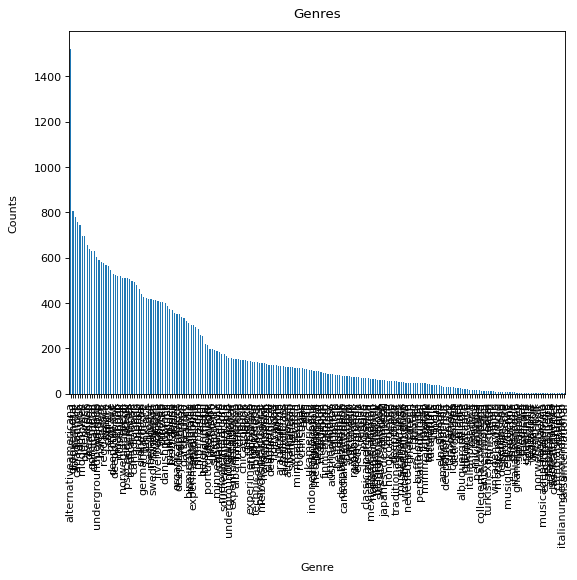

In [13]:
# Total number of genre in the English data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df2['Genre'].value_counts(normalize=False).plot(kind='bar');
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Genres", y=1.02);

In [14]:
unique_genre = unique(df2.Genre)
print(unique_genre)
print(len(unique_genre))


['celticmetal', 'balkantrap', 'slovakrock', 'deepchill-out', 'ghanaianhiphop', 'e6fi', 'ostrock', 'slovakindie', 'persiantraditional', 'albanianhiphop', 'modernblues', 'canadianpop', 'portuguesefolk', 'belgianpop', 'runefolk', 'psychill', 'deepcomedy', 'lapop', 'balletclass', 'khmer', 'groovemetal', 'pianoblues', 'dronemetal', 'dreampop', 'swedishindiepop', 'undergroundpowerpop', 'sungpoetry', 'mexicanrock-and-roll', 'minimaldub', 'belgianmetal', 'raregroove', 'newrave', 'japanesedeathmetal', 'arabichiphop', 'italianbaroque', 'gothicmetal', 'worship', 'undergroundlatinhiphop', 'norwegianmetal', 'dronefolk', 'zeuhl', 'oratory', 'mathpop', 'romanianfolk', 'sinhala', 'deeplatinjazz', 'alternativeamericana', 'birminghamindie', 'bostonmetal', 'go-go', 'tropicalhouse', 'spanishfolk', 'russianpunk', 'canadianrock', 'country', 'liverpoolindie', 'gabba', 'substep', 'mandepop', 'doo-wop', 'darktechno', 'salsa', 'deepbrazilianpop', 'torontoindie', 'messianicpraise', 'blues-rock', 'psychedelicfolk

In [29]:
# Grouping the genres into larger groups. 
large_genre = ["metal", "rap", "rock", "hiphop", "blues", "pop", "folk", "chill", "comedy", "rave", 
               "roove","indie","jazz","house","punk","soul", "hardcore"]
def groop_genre(genre):
    find = False
    for g in large_genre:
        if genre.find(g) != -1:
            return g
            find = True
    if not find:
        return genre

In [16]:

import string
def count_words(st):
    return sum([i.strip(string.punctuation).isalpha() for i in st.split()])


In [30]:
# Removing to long lyrics
grouped_genre = []
length_of_lyrics = []
to_long_songs = []
for i,g in df2.iterrows():
    grouped_genre.append(groop_genre(g.Genre))
    if count_words(g.lyrics) > 1560:
        to_long_songs.append(i)
    else:
        length_of_lyrics.append([count_words(g.lyrics)])

df2["grouped_genre"] = grouped_genre
print(len(unique(df2.grouped_genre)))

117


In [31]:
# Number of "lyrics" that was longer 1560
len(to_long_songs)

4846

In [32]:
df3 = df2.drop(to_long_songs)

In [33]:
print("There is",df3.shape[0],"songs left and the average length of each song is", np.average(length_of_lyrics),"words.")

There is 34250 songs left and the average length of each song is 293.28744525547444 words.


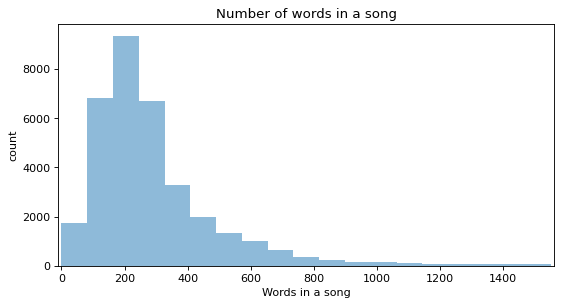

In [34]:
import math
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')

bins = np.linspace(math.ceil(np.min(length_of_lyrics)), 
                   math.floor(np.max(length_of_lyrics)),
                   20)
plt.xlim([np.min(length_of_lyrics)-10, np.max(length_of_lyrics)+10])

plt.hist(np.array(length_of_lyrics), bins=bins, alpha=0.5)
plt.title('Number of words in a song')
plt.xlabel('Words in a song')
plt.ylabel('count')
plt.savefig("images/hist_words.png")
#plt.show()

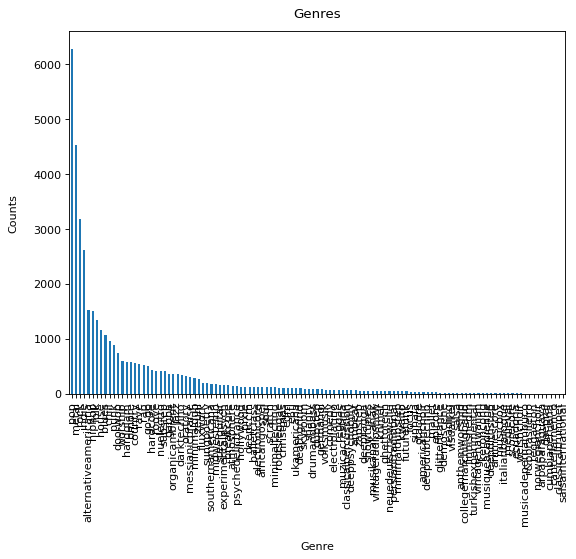

In [35]:
# Genres after removing grouping the data.
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df2['grouped_genre'].value_counts(normalize=False).plot(kind='bar');
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Genres", y=1.02);
plt.savefig("images/genre_bar.png")

In [43]:
# Top 20 largest genre and the total number of genre. 
min_value = df3['grouped_genre'].value_counts(normalize=False)[19]
print(min_value)
print(len(unique(df3.grouped_genre)))

405
117


In [44]:
# Saving the data from the 20 largest genre.
saved_genre = df3['grouped_genre'].value_counts(normalize=False) >= min_value
drop_ite = []
for i,l in df3.iterrows():
    if not saved_genre[l.grouped_genre]:
        drop_ite.append(i)
df4 = df3.drop(drop_ite)

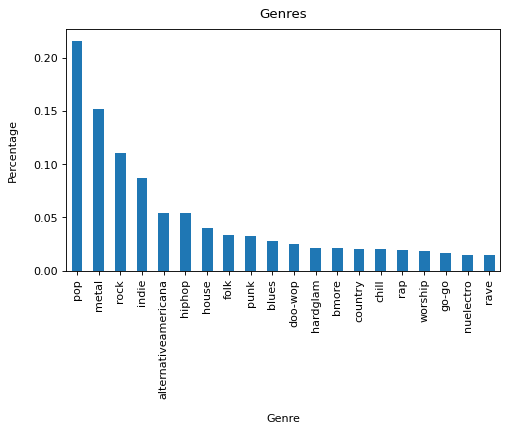

In [45]:
# Barplot over the genres saved. 
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
df4['grouped_genre'].value_counts(normalize=True).plot(kind='bar');
plt.xlabel("Genre", labelpad=14)
plt.ylabel("Percentage", labelpad=14)
plt.title("Genres", y=1.02);
plt.savefig("images/genre_bar.png")

In [46]:
# Size of the data saved
unique_genre = unique(df4.grouped_genre)
print(len(unique_genre))
print(df4.shape)

20
(26912, 25)


In [49]:
df4.loc[0]

lyrics              It has been so long eating and drinking being ...
language                                                           en
art_name                                                          NaN
song_name                                                         NaN
Name                                                       YuveYuveYu
Danceability                                                    0.624
Energy                                                          0.857
Key                                                                10
Loudness                                                        -6.25
Mode                                                                0
Speechness                                                     0.0542
Acousticness                                                   0.0208
Instrumentalness                                                0.206
Liveness                                                         0.11
Valence             

In [50]:
df4.lyrics[0]

"It has been so long eating and drinking being merry How strange, how strange Taking our Great Mongol ancestors names in vain How strange, how strange Yet, would not honor our oath and destiny How strange, how strange Why the valuable ethics of ancestors become worthless? How strange, how strange Hey, you traitor Kneel down Hey, Prophecies be declared You've born in ancestor’s fate yet Sleeping deeply, can't be awakened How strange, how strange Blindly declaring that Only Mongols are the best How strange, how strange Born to live as nobles Yet, can't unite as one How strange, how strange Why is it difficult to rise up our nation up? How strange, how strange Hey, you traitor Kneel down Hey, Prophecies be declared Why it’s so hard to cherish the Ancestors' inherited land? How strange, how strange Why priceless edifications of elders turning to ashes? How strange, how strange With the future of eternal prosperity, The Wolf totemed Mongols have the blessings of Heaven Born with undeniable 

In [47]:
# Save data
df4.to_csv("lyrics_01_09.csv", index=False, header = True)